In [1]:
import os
from os.path import join as oj
import sys, time
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from copy import deepcopy
import pickle as pkl
import pandas as pd
import math
# plt.style.use('dark_background')
from data_load_preprocess import data
from collections import OrderedDict
from sklearn import preprocessing

import torch
from torch.autograd import Variable
from viz import viz
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")
import viz_losses, viz_weights

%load_ext autoreload
%autoreload 2

In [2]:
from scipy.stats import entropy
from scipy.stats import ks_2samp

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
import matplotlib as mpl
import matplotlib.pylab as pylab
label_size = 12
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
mpl.rcParams['axes.labelsize'] = label_size
mpl.rcParams['axes.titlesize'] = label_size
mpl.rcParams['figure.titlesize'] = label_size
mpl.rcParams['lines.markersize'] = 20
mpl.rcParams['lines.linewidth'] = 3.
mpl.rcParams['grid.linewidth'] = 1.
mpl.rcParams['legend.fontsize'] = label_size
pylab.rcParams['xtick.major.pad']=3
pylab.rcParams['ytick.major.pad']=3
# mpl.rcParams['figure.figsize'] = [12, 10]
# mpl.rcParams.keys()
# Say, "the default sans-serif font is COMIC SANS"
# mpl.rcParams['font.serif'] = 'Times New Roman'
# # Then, "ALWAYS use sans-serif fonts"
# mpl.rcParams['font.family'] = "Serif"



# load results from a directory

In [5]:
# out_dir_main = '/scratch/users/vision/yu_dl/raaz.rsk/adam_vs_sgd_ref'
out_dir_main = '/scratch/users/vision/yu_dl/raaz.rsk/track_acts/sweep_full_real'
folder = ''

In [822]:
results.shape

(688, 46)

In [6]:
# depending on how much is saved, this may take a while
# out_dir = oj(out_dir_main, folder)
# fnames = sorted(os.listdir(out_dir))
# results_list = [pd.Series(pkl.load(open(oj(out_dir, fname), "rb"))) for fname in tqdm(fnames) if not fname.startswith('weights')]
# results = pd.concat(results_list, axis=1).T.infer_objects()

# save_dir = 'test'
# if not os.path.exists(save_dir):
#     os.makedirs(save_dir)

100%|██████████| 1376/1376 [08:10<00:00,  2.81it/s]


In [606]:
# for i in range(len(results)):
#     results.accs_train[i] *= 100/results.batch_size[i]
#     results.accs_test[i] *=  100/results.batch_size[i]

In [610]:
results['max_train_acc'] = np.array([max(results.accs_train[i]) for i in range(len(results)) ]) 
results['max_test_acc'] = np.array([max(results.accs_test[i]) for i in range(len(results)) ])

In [823]:
# plt.plot([results['weight_norms'][idxs[0]][i]['fc.0.weight_fro'] for i in range(150)])
# plt.plot([results['weight_norms'][idxs[0]][i]['fc.0.weight_spectral'] for i in range(150)])

# plt.plot([results['weight_norms'][idxs[0]][i]['fc.1.weight_fro'] for i in range(150)])
# plt.plot([results['weight_norms'][idxs[0]][i]['fc.1.weight_spectral'] for i in range(150)])


In [7]:
results.keys()

(Index(['accs_test', 'accs_test_r', 'accs_train', 'accs_train_r',
        'act_singular_val_dicts_test_pca', 'act_singular_val_dicts_test_rbf',
        'act_singular_val_dicts_train_pca', 'act_singular_val_dicts_train_rbf',
        'batch_size', 'calc_activations', 'dset', 'freeze', 'hidden_size',
        'its', 'losses_test', 'losses_test_r', 'losses_train', 'losses_train_r',
        'lr', 'lr_step', 'lr_ticks', 'mean_margin_test',
        'mean_margin_test_unnormalized', 'mean_margin_train',
        'mean_margin_train_unnormalized', 'num_iters', 'num_iters_small',
        'num_layers', 'optimizer', 'out_dir', 'save_acts_and_reduce',
        'save_all_weights_freq', 'saves_per_iter', 'saves_per_iter_end', 'seed',
        'shuffle_labels', 'singular_val_dicts_cosine', 'singular_val_dicts_lap',
        'singular_val_dicts_pca', 'singular_val_dicts_rbf', 'use_conv',
        'use_conv_special', 'weight_names', 'weight_norms'],
       dtype='object'), 688)

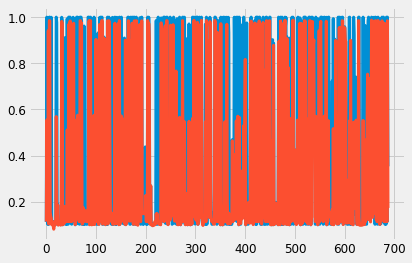

In [611]:
plt.plot(results['max_train_acc'])
plt.plot(results['max_test_acc'])
plt.show()

In [591]:
# use this function to create a filter based on several conditions
def idx_filter(conds):
    ans = np.bool(len(conds[0]))
    for cond in conds:
        ans = ans & cond
    return np.where(ans)[0]

In [787]:
# different conditions

cifar_conds = [(results.max_train_acc <= 1.), 
        (results.max_train_acc >= .95), 
        (results.dset=='cifar10'),
        (results.num_layers==4),
#         (results.seed==2),
        (results.optimizer=='sgd'), 
#         (results.lr==0.01), 
        (results.batch_size==100),
       ]
mnist_conds = [(results.max_train_acc <= 1.), 
        (results.max_train_acc >= .95), 
        (results.dset=='mnist'),
        (results.num_layers==4),
#         (results.seed==2),
        (results.optimizer=='sgd'), 
#         (results.lr==0.001), 
        (results.batch_size==100),
       ]


# cifar_idxs = idx_filter(cifar_conds)



In [788]:
# get a sense of results based on the filters, sorted by a few fields

# cifar 10
results[['dset','max_train_acc', 'max_test_acc', 
         'shuffle_labels', 'seed','optimizer', 'lr', 
         'num_layers', 'batch_size']].loc[idx_filter(cifar_conds)].sort_values(
    ['optimizer', 'num_layers','lr', 
     'batch_size','seed',])

,dset,max_train_acc,max_test_acc,shuffle_labels,seed,optimizer,lr,num_layers,batch_size
320,cifar10,0.96882,0.5466,False,0,sgd,0.01,4,100
191,cifar10,0.96686,0.5489,False,1,sgd,0.01,4,100
49,cifar10,0.96638,0.5468,False,2,sgd,0.01,4,100
249,cifar10,1.00000,0.1201,True,0,sgd,0.10,4,100
518,cifar10,1.00000,0.5748,False,0,sgd,0.10,4,100
356,cifar10,1.00000,0.1225,True,1,sgd,0.10,4,100
587,cifar10,1.00000,0.5714,False,1,sgd,0.10,4,100
96,cifar10,1.00000,0.5749,False,2,sgd,0.10,4,100
442,cifar10,1.00000,0.1349,True,2,sgd,0.10,4,100


In [789]:
# mnist

results[['dset','max_train_acc', 'max_test_acc', 'shuffle_labels', 'seed','optimizer', 'lr', 'num_layers', 'batch_size']].loc[idx_filter(mnist_conds)].sort_values(
     ['shuffle_labels', 'optimizer', 'num_layers', 'batch_size', 'lr', 'seed',])

,dset,max_train_acc,max_test_acc,shuffle_labels,seed,optimizer,lr,num_layers,batch_size
71,mnist,0.983550,0.9733,False,0,sgd,0.01,4,100
55,mnist,0.983600,0.9734,False,1,sgd,0.01,4,100
172,mnist,0.984483,0.9729,False,2,sgd,0.01,4,100
428,mnist,1.000000,0.9836,False,0,sgd,0.10,4,100
675,mnist,1.000000,0.9841,False,1,sgd,0.10,4,100
126,mnist,1.000000,0.9844,False,2,sgd,0.10,4,100
21,mnist,0.976617,0.2070,True,0,sgd,1.00,4,100
348,mnist,0.977300,0.1480,True,1,sgd,1.00,4,100
403,mnist,0.974867,0.1631,True,2,sgd,1.00,4,100


# What to plot

- here we select indices and provide title/legend labels so that we can keep a track of what we are comparing
- idxs_list provides a list of lists (mostly one list). 
- each outer list is labeled by label_list and each sublist is labeled by labels
- I have manually selected the indices based on what I wanted to compare, didn't create a function because 
  there are too many things to specify.
- If the indices and labels are well-specified, rest of the code can be run directly.

In [ ]:
## MNIST INDICES
# idxs_list = [[112, 428]] # just one list
# labels = ['adam', 'sgd'] #  different optimizer across indices
# label_list = ['mnist-adam-vs-sgd'] # suptitle label

idxs_list = [[172, 126]] # just one list
labels = ['small step 0.01', 'large step 0.1'] # different step sizes across indices
label_list = ['mnist-effect-of-step-size-sgd'] 

# idxs_list = [[69, 112, 204]] # just one list
# labels = ['bs10', 'bs100', 'bs1000'] # different batch sizes across indices for adam
# label_list = ['mnist4L-batch-size-adam-0.001']

# idxs_list = [[480, 675, 419]] # just one list
# labels = ['bs10', 'bs100', 'bs1000'] # different batch sizes across indices for sgd
# label_list = ['mnist4L-batch-size-sgd-0.1']
 
# idxs_list = [[680, 71, 513]] # just one list
# labels = ['bs10', 'bs100', 'bs1000'] # different batch and step sizes across indices for sgd
# label_list = ['mnist4L-batch-size-sgd-0.001-0.01-0.1']

# =========================

## CIFAR INDICES


# idxs_list = [[429, 164]] # just one list
# labels = ['adam', 'sgd'] # same step size, similar accuracy
# label_list = ['cifar-adam-vs-sgd']

# idxs_list = [[109, 528, 425]] # just one list
# labels = ['bs10', 'bs100', 'bs1000'] # same step size, similar accuracy
# label_list = ['cifar2L-batch-size-adam']

# idxs_list = [[524, 85, 268]] # just one list
# labels = ['bs10', 'bs100', 'bs1000'] # same step size, similar accuracy
# label_list = ['cifar4L-batch-size-adam-0.001']

# idxs_list = [[559, 587, 63]] # just one list
# labels = ['bs10', 'bs100', 'bs1000'] # same step size, similar accuracy
# label_list = ['cifar4L-batch-size-sgd-0.01-0.1-1']

# idxs_list = [[49, 518]] # just one list
# labels = ['small step', 'large step'] # sgd
# label_list = ['cifar4L-effect-of-step-size-sgd']

# idxs_list = [[528, 110], [567, 547]] # TWO LISTS
# labels = ['true label', 'random label'] # true vs random labels
# label_list = ['cifar-adam', 'cifar-sgd'] # adam vs sgd



## Prelim view



In [ ]:
# first we visualize losses

fields = ['losses_train', 'losses_test', 'accs_train', 'accs_test']
num_epochs = 150

for idxs, lab in zip(idxs_list, label_list):
    
    plt.figure(figsize=[4*len(fields), 4])
    for i, field in enumerate(fields):
        plt.subplot(1, len(fields), i+1)
        for j, idx in enumerate(idxs):
            plt.plot(results[field][idx], label=labels[j])
        plt.legend()
        plt.title(field)
    plt.suptitle(lab)
    plt.show()

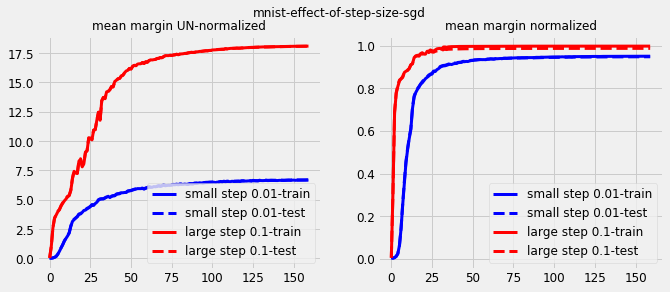

In [791]:
colors = ['blue', 'red', 'black']
for k, (idxs, lab) in enumerate(zip(idxs_list, label_list)):
    plt.figure(figsize=[10, 4])
    plt.subplot(121)
    for j, idx in enumerate(idxs):
        plt.plot(results.mean_margin_train_unnormalized[idx], color=colors[j], label=labels[j]+'-train')
        plt.plot(results.mean_margin_test_unnormalized[idx], linestyle='--', color=colors[j], 
                 label=labels[j]+'-test')
    plt.legend()
    plt.title('mean margin UN-normalized')

    plt.subplot(122)
    for j, idx in enumerate(idxs):
        plt.plot(results.mean_margin_train[idx]*100/results.batch_size[idx], color=colors[j], label=labels[j]+'-train')
        plt.plot(results.mean_margin_test[idx]*100/results.batch_size[idx], linestyle='--', color=colors[j], 
                 label=labels[j]+'-test')
    plt.legend()
    plt.title('mean margin normalized')
    plt.suptitle(label_list[k])
    plt.show()

### More figures
- Keep savfig off, unless you want to save figure in which case specify the file name carefully.
- plotfig should be set to True to plot the figures
- but there are too many figures and notebook can not be saved, so turn it to False and run the cells so that the notebook can be saved.

In [845]:
savepath = 'figures/shuffle/'
savfig = False
plotfig = True
if savfig:
    fs = [12, 10]

layer = 1, weight-key = fc.0.weight, activation-key = fc.0, hidden nodes = 512


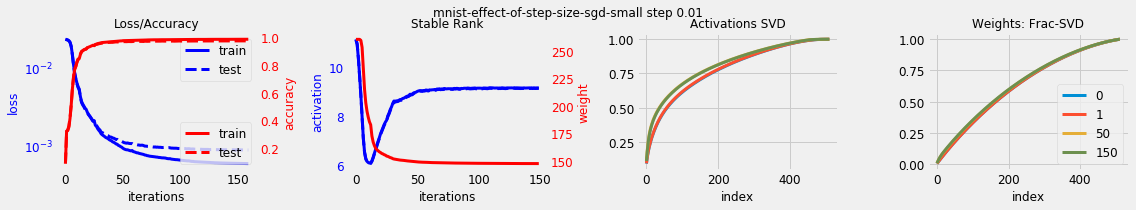

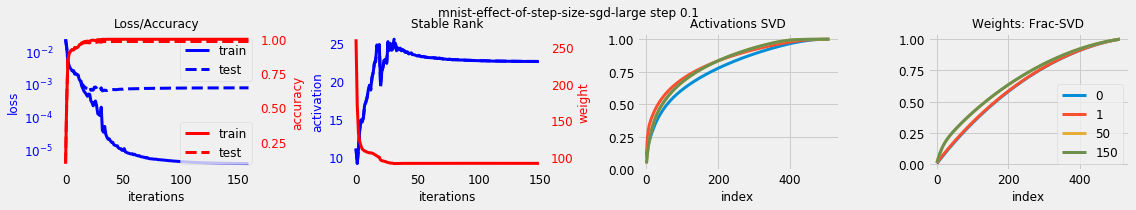

layer = 2, weight-key = fc.1.weight, activation-key = fc.1, hidden nodes = 512


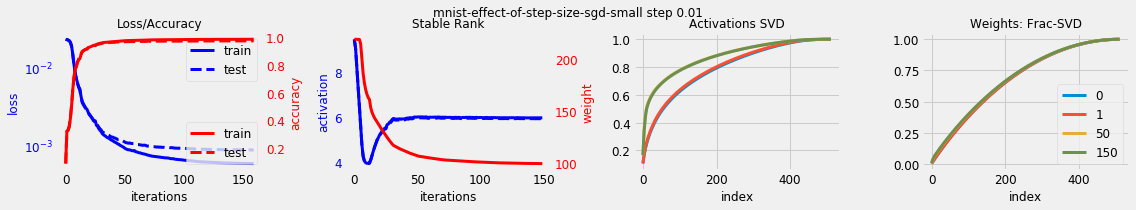

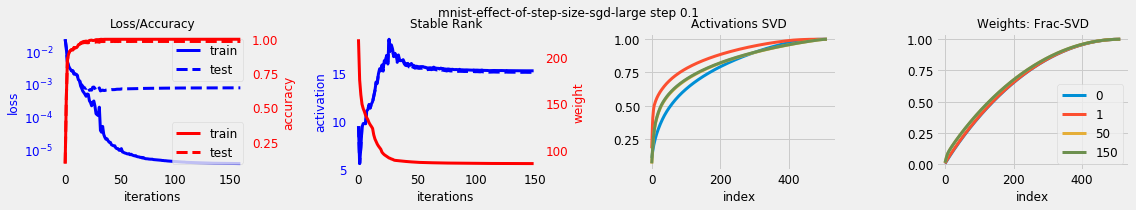

layer = 3, weight-key = fc.2.weight, activation-key = fc.2, hidden nodes = 512


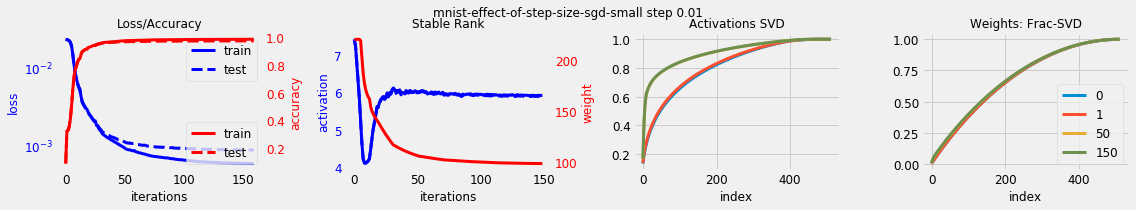

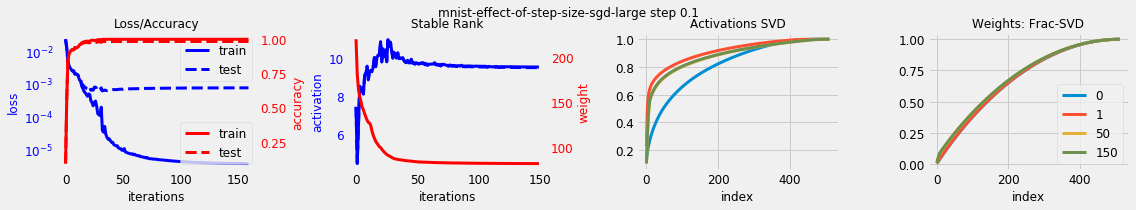

layer = 4, weight-key = fc.3.weight, activation-key = fc4, hidden nodes = 10


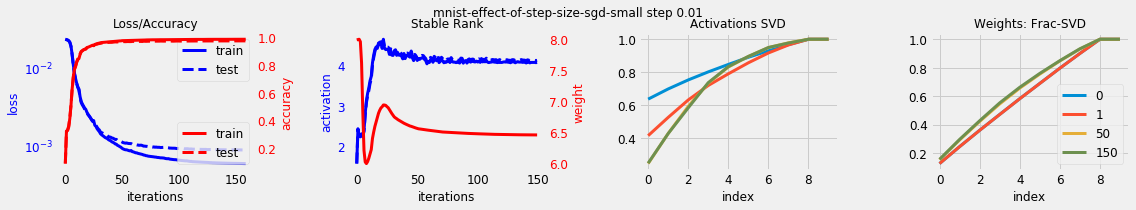

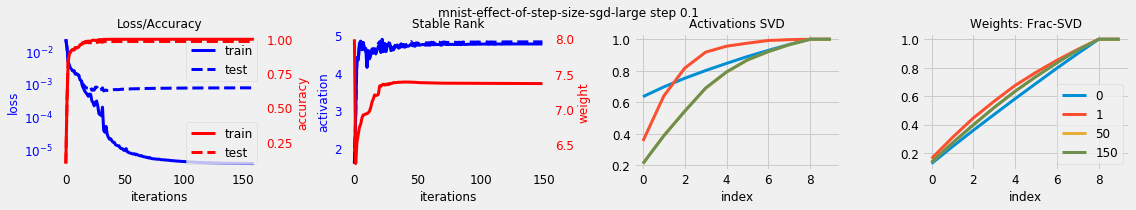

In [794]:
suffix = '_summary.pdf'
if plotfig:
    for k, (idxs, lab) in enumerate(zip(idxs_list, label_list)):
        wkyes = sorted(results['singular_val_dicts_pca'][idxs[0]][0].keys())
        akeys = sorted(results['act_singular_val_dicts_train_pca'][idxs[0]][0].keys())
        for i, (weight_key, act_key) in enumerate(zip(wkeys, akeys)):
            if i < len(results['singular_val_dicts_pca'][idxs[0]][0].keys()):
                print('layer = %d, weight-key = %s, activation-key = %s, hidden nodes = %d'%(i+1, 
                    weight_key, act_key, len(results['act_singular_val_dicts_train_pca'][idx][0][act_key])))
                R, C = 1, 4

                for label, idx in zip(labels, idxs):
                    plt.figure(figsize=[4*C, R*3])
                    optim = results['optimizer'][idx]
                    lr = results['lr'][idx]
                    test_acc = results['accs_test'][idx][-1]

                    plt.subplot(141)    
                    plt.semilogy(results['losses_train'][idx], label='train', color='blue')
                    plt.semilogy(results['losses_test'][idx], linestyle='--', label='test', color='blue')
                    plt.ylabel('loss', color='blue')
                    plt.yticks(color='blue')
                    plt.xlabel('iterations')
                    plt.legend()
                    plt.grid(False)
                    plt.twinx()
                    plt.plot(results['accs_train'][idx], label='train', color='red')
                    plt.plot(results['accs_test'][idx], linestyle='--', label='test', color='red')
                    plt.ylabel('accuracy', color='red')
                    plt.yticks(color='red')
                    plt.title('Loss/Accuracy')
                    plt.grid(False)
                    plt.legend()

                    plt.subplot(142)    
                    stable_rank_acts =  np.array([np.sum(results['act_singular_val_dicts_train_pca'][idx][e][act_key])
                                                  /results['act_singular_val_dicts_train_pca'][idx][e][act_key][0] for e in range(num_epochs)])
                    stable_rank_acts_test =  np.array([np.sum(results['act_singular_val_dicts_test_pca'][idx][e][act_key])
                                                       /results['act_singular_val_dicts_test_pca'][idx][e][act_key][0] for e in range(num_epochs)])
                    stable_rank_weights = np.array([np.sum(results['singular_val_dicts_pca'][idx][e][weight_key])/
                                                    results['singular_val_dicts_pca'][idx][e][weight_key][0] for e in range(num_epochs)])

                    entropy_acts = np.array([entropy(results['act_singular_val_dicts_train_pca'][idx][e][act_key]) for e in range(num_epochs)])
                    entropy_acts_test = np.array([entropy(results['act_singular_val_dicts_test_pca'][idx][e][act_key]) for e in range(num_epochs)])
                    entropy_weights = np.array([entropy(results['singular_val_dicts_pca'][idx][e][weight_key]) for e in range(num_epochs)])

                    tr, te, w, title = stable_rank_acts, stable_rank_acts_test, stable_rank_weights, 'Stable Rank'
        #             tr, te, w, title = entropy_acts, entropy_acts_test, entropy_weights, 'Entropy'

                    plt.plot(tr,  color='blue')
                    plt.plot(te, linestyle='--', color='blue')
                    plt.ylabel('activation', color='blue')
                    plt.yticks(color='blue')
                    plt.xlabel('iterations')
                    plt.grid(False)
                    plt.twinx()
                    plt.plot(w, color='red')
                    plt.ylabel('weight', color='red')
                    plt.yticks(color='red')
                    plt.title(title)
                    plt.grid(False)


                    for epoch in epochs:
                        plt.subplot(143)
                        yval = results['act_singular_val_dicts_train_pca'][idx][epoch][act_key].cumsum()
                        yval /= np.sum(results['act_singular_val_dicts_train_pca'][idx][epoch][act_key])
                        plt.plot(yval, label=epoch)
                        plt.xlabel('index')
                        if epoch == 0:
                            plt.title('Activations SVD')

                        plt.subplot(144)
                        yval = results['singular_val_dicts_pca'][idx][epoch][weight_key].cumsum()
                        yval /= np.sum(results['singular_val_dicts_pca'][idx][epoch][weight_key])
                        plt.plot(yval, label=epoch)
                        if epoch == 0:
                            plt.title('Weights: Frac-SVD')
                        plt.xlabel('index')
                    plt.suptitle(lab+'-'+label)
                    plt.legend()
                    plt.tight_layout()
                    if savfig:  
                        plt.savefig(savepath+'layer_%d_%s'%(i+1, optim)+suffix)
                        plt.close
                    else:
                        plt.show()


In [795]:
# label_size = 30
# mpl.rcParams['xtick.labelsize'] = label_size 
# mpl.rcParams['ytick.labelsize'] = label_size 
# mpl.rcParams['axes.labelsize'] = label_size
# mpl.rcParams['axes.titlesize'] = label_size
# mpl.rcParams['figure.titlesize'] = label_size
# mpl.rcParams['lines.markersize'] = 20
# mpl.rcParams['lines.linewidth'] = 5.
# mpl.rcParams['grid.linewidth'] = 1.
# mpl.rcParams['legend.fontsize'] = label_size
# pylab.rcParams['xtick.major.pad']=3
# pylab.rcParams['ytick.major.pad']=3
# # mpl.rcParams['figure.figsize'] = [12, 10]

# Summary of visualization

Contrasting the weights and activations for the two datasets MNIST and CIFAR

- Summary statistics: Stable rank and entropy with epoch

- Evolution of cumsum of singular values across epochs

- Evolution of histogram across epochs

- Comparison of histogram for each label at initialization and after training.


## Summmary Statistics 

In [832]:
if plotfig:
    for lab, idxs in zip(label_list, idxs_list):
        wkyes = sorted(results['singular_val_dicts_pca'][idxs[0]][0].keys())
        akeys = sorted(results['act_singular_val_dicts_train_pca'][idxs[0]][0].keys())
        if savfig:
            plt.figure(figsize=fs)
        else:
            plt.figure(figsize=[8, 4])
            plt.subplot(1,2,1)

        for k, (idx, label) in enumerate(zip(idxs, labels)):
            plt.semilogy(results['losses_train'][idx], label=label)
        plt.title('Training Loss')
        plt.legend()
        plt.xlabel('Epoch')
        plt.tight_layout()
        
        if savfig:
            plt.savefig(savepath+'train_loss.pdf')
            plt.close()
            plt.figure(figsize=fs)
        else:
            plt.subplot(1,2,2)

        for k, (idx, label) in enumerate(zip(idxs, labels)):
            plt.plot(results['accs_train'][idx], label=label)
        plt.title('Training Accuracy')
        plt.legend()
        plt.xlabel('Epoch')
        plt.tight_layout()
        plt.suptitle(lab)
        if savfig:
            plt.savefig(savepath+'train_accuracy.pdf')
            plt.close()
        else:
            plt.show()

        for i, (weight_key, act_key) in enumerate(zip(wkeys, akeys)):

            comfix = 'Layer %d '%(i+1)
            figfix = 'layer_%d_'%(i+1)
            if not savfig:
                plt.figure(figsize=[4*4, 4])
            if i < len(results['singular_val_dicts_pca'][idxs[0]][0].keys()):
                if savfig:
                    plt.figure(figsize=fs)
                else:
                    plt.subplot(1, 4, 1)
                for k, (idx, label) in enumerate(zip(idxs, labels)):
                    stable_rank_weights =  np.array([
                        np.sum(results['singular_val_dicts_pca'][idx][e][weight_key])/results['singular_val_dicts_pca'][idx][e][weight_key][0] 
                                                     for e in range(num_epochs)])
                    plt.plot(stable_rank_weights, label=label)
                plt.title(comfix+'Weights: Stable rank')
                plt.legend()
                plt.xlabel('Epoch')
                plt.tight_layout()

                if savfig:
                    plt.savefig(savepath+figfix+'weights_stable_rank.pdf')
                    plt.close()
                    plt.figure(figsize=fs)
                else:
                    plt.subplot(1, 4, 2)

                for k, (idx, label) in enumerate(zip(idxs, labels)):
                    entropy_weights =  np.array([entropy(results['singular_val_dicts_pca'][idx][e][weight_key]) for e in range(num_epochs)])
                    plt.plot(entropy_weights, label=label)
                plt.title(comfix+'Weights: Entropy')
                plt.legend()
                plt.xlabel('Epoch')
                plt.tight_layout()
                if savfig:
                    plt.savefig(savepath+figfix+'weights_entropy.pdf')
                    plt.close()
                    plt.figure(figsize=fs)
                else:
                    plt.subplot(1, 4, 3)


                for k, (idx, label) in enumerate(zip(idxs, labels)):
                    stable_rank_acts =  np.array([
                        np.sum(results['act_singular_val_dicts_train_pca'][idx][e][act_key])
                        /results['act_singular_val_dicts_train_pca'][idx][e][act_key][0] for e in range(num_epochs)])
                    plt.plot(stable_rank_acts, label=label)
                plt.title(comfix+'Training Activations: Stable rank')
                plt.legend()
                plt.xlabel('Epoch')
                plt.tight_layout()
                if savfig:
                    plt.savefig(savepath+figfix+'train_acts_stable_rank.pdf')
                    plt.close()
                    plt.figure(figsize=fs)
                else:
                    plt.subplot(1, 4, 4)

                for k, (idx, label) in enumerate(zip(idxs, labels)):
                    entropy_acts =  np.array([entropy(results['act_singular_val_dicts_train_pca'][idx][e][act_key]) for e in range(num_epochs)])
                    plt.plot(entropy_acts, label=label)
                plt.title(comfix+'Activations: Entropy')
                plt.legend()
                plt.xlabel('Epoch')
                plt.tight_layout()
                plt.suptitle('#hidden=%d'%(len(results['act_singular_val_dicts_train_pca'][idx][e][act_key])))
                if savfig:
                    plt.savefig(savepath+figfix+'train_acts_entropy.pdf')
                    plt.close()
                else:
                    plt.show()


## Looking at cumsum

In [835]:
epochs = [0, 1, 50, 150]
if plotfig:
    for lab, idxs in zip(label_list, idxs_list):
        wkyes = sorted(results['singular_val_dicts_pca'][idxs[0]][0].keys())
        akeys = sorted(results['act_singular_val_dicts_train_pca'][idxs[0]][0].keys())
        for i, (weight_key, act_key) in enumerate(zip(wkeys, akeys)):
            if i<len(results['singular_val_dicts_pca'][idxs[0]][0].keys()):
                if not savfig:
                    plt.figure(figsize=[4*4, 4])
                for j, e in enumerate(epochs):
                    figfix = 'layer_%d_cumsum_epoch_%d_'%(i+1, e)
                    comfix = 'Layer %d '%(i+1)

                    if savfig:
                        plt.figure(figsize=fs)
                    else:
                        plt.subplot(1, 4, j+1)
                    for idx, label in zip(idxs, labels):
                        yval = results['singular_val_dicts_pca'][idx][e][weight_key].cumsum()
                        yval /= yval[-1]
                        plt.plot(yval, label=label), 
                    plt.title(comfix+'Weights: Epoch=%d'%(e))
                    plt.legend()
                    plt.tight_layout()
                    if savfig:
                        plt.savefig(savepath+figfix+'weights.pdf')
                        plt.close()
                plt.suptitle(lab+' Layer %d'%(i+1))
                if not savfig:
                    plt.show()
                    plt.figure(figsize=[4*4, 4])

                for j, e in enumerate(epochs):
                    figfix = 'layer_%d_cumsum_epoch_%d_'%(i+1, e)
                    comfix = 'Layer %d '%(i+1)
                    if savfig:
                        plt.figure(figsize=fs)
                    else:
                        plt.subplot(1, 4, j+1)
                    for idx, label in zip(idxs, labels):
                        yval = results['act_singular_val_dicts_train_pca'][idx][e][act_key].cumsum()
                        yval /= yval[-1]
                        plt.plot(yval, label=label),

                    plt.title(comfix+'Activations: Epoch=%d'%(e))
                    plt.legend()
                    plt.tight_layout()
                    if savfig:
                        plt.savefig(savepath+figfix+'train_acts.pdf')
                        plt.close()
                plt.suptitle(lab+' Layer %d'%(i+1))
                if not savfig:
                    plt.show()

## Looking at histogram

Log scale histogram comparison at epochs


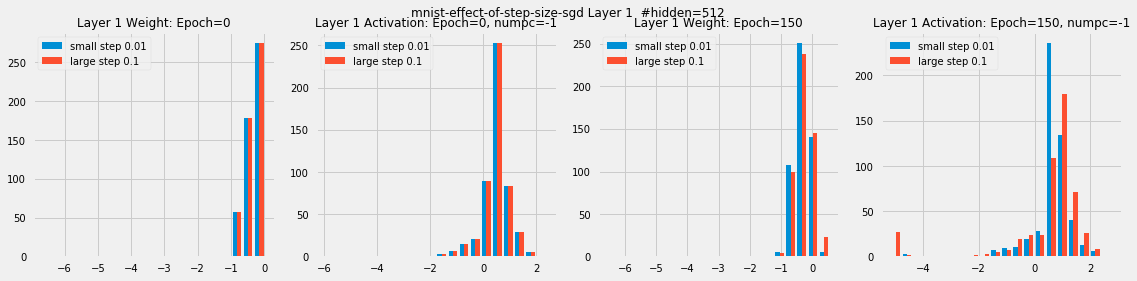

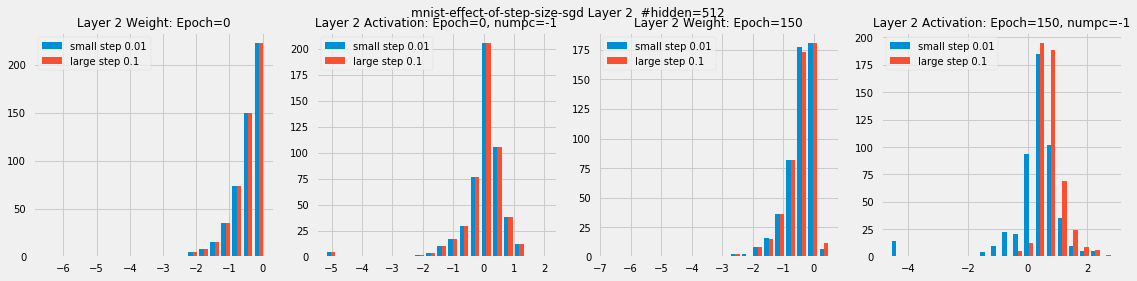

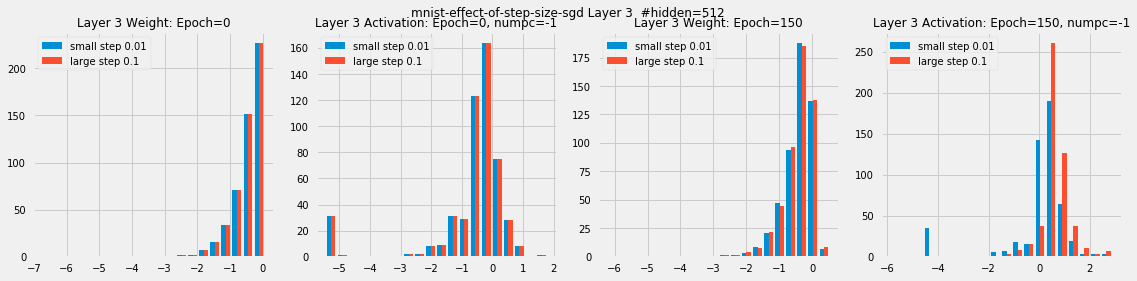

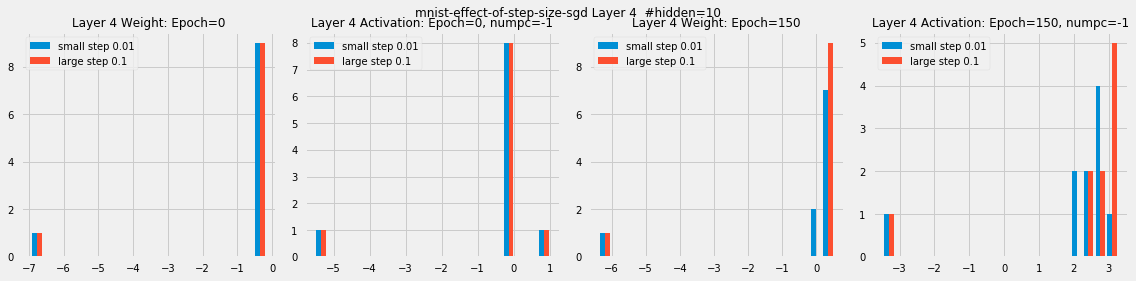

In [846]:

print('Log scale histogram comparison at epochs')
if plotfig:
    for lab, idxs in zip(label_list, idxs_list):
        wkyes = sorted(results['singular_val_dicts_pca'][idxs[0]][0].keys())
        akeys = sorted(results['act_singular_val_dicts_train_pca'][idxs[0]][0].keys())
        for i, (weight_key, act_key) in enumerate(zip(wkeys, akeys)):
            if True:
                if not savfig:
                    plt.figure(figsize=[4*4, 4])
                for j, e in enumerate([epochs[0], epochs[-1]]):
                    figfix = 'layer_%d_hist_epoch_%d_'%(i+1, e)
                    comfix = 'Layer %d '%(i+1)
                    if savfig:
                        plt.figure(figsize=fs)
                    else:
                        plt.subplot(1, 4, 2*j+1)
                    data = []
                    for idx in idxs:
                        data.append(np.log10(results['singular_val_dicts_pca'][idx][e][weight_key]))
                    plt.hist(data, bins=20, label=labels)
                    plt.title(comfix+'Weight: Epoch=%d'%e)
                    plt.legend()
                    plt.tight_layout()
                    idx = idxs[0]
                    plt.suptitle(results.optimizer[idx]+' '+str(results.lr[idx])+' #hidden=%d'%(len(results['act_singular_val_dicts_train_pca'][idx][e][act_key])))
                    if savfig:
                        plt.savefig(savepath+figfix+'weights.pdf')
                        plt.close()
                        plt.figure(figsize=fs)
                    else:
                        plt.subplot(1, 4, 2*j+2)

                    data = []
                    for idx in idxs:
                        data.append(np.log10(results['act_singular_val_dicts_train_pca'][idx][e][act_key]))
                    plt.hist(data, bins=20, label=labels)
                    plt.title(comfix+'Activation: Epoch=%d, numpc=%d'%(e, dim_acts))            
                    plt.legend()
                    plt.tight_layout()
                    if savfig:
                        plt.savefig(savepath+figfix+'train_acts.pdf')
                        plt.close()
                if not savfig:
                    plt.suptitle(lab+' Layer %d '%(i+1)+' #hidden=%d'%(len(results['act_singular_val_dicts_train_pca'][idx][e][act_key])))
                    plt.show()


Normal scale histogram comparison at epochs


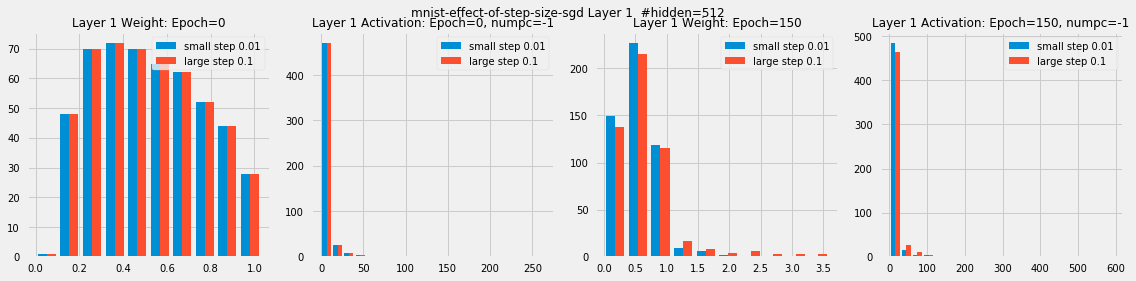

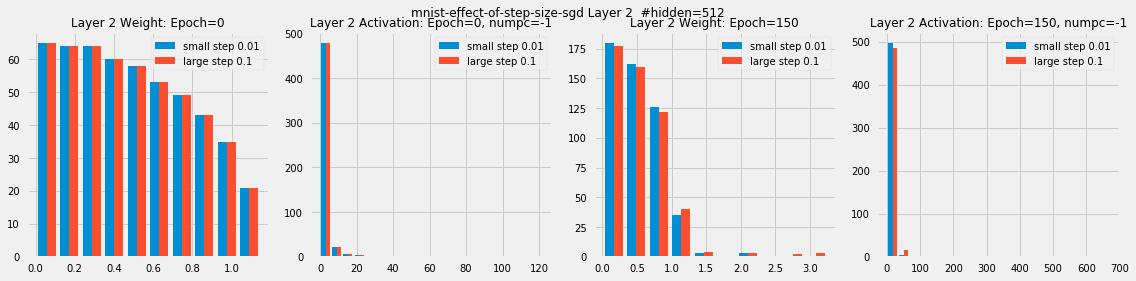

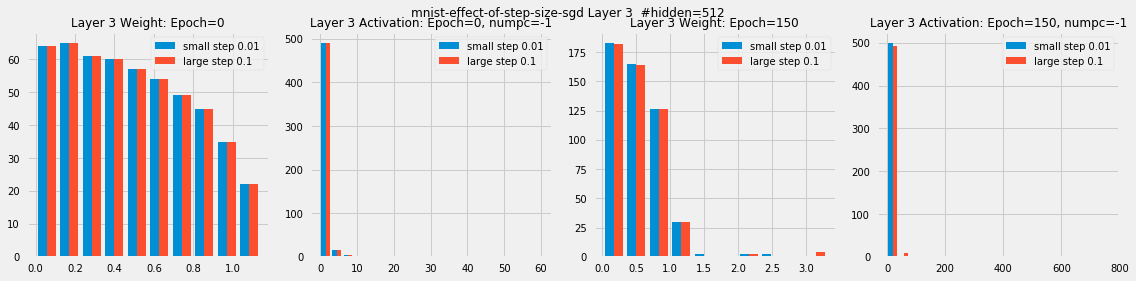

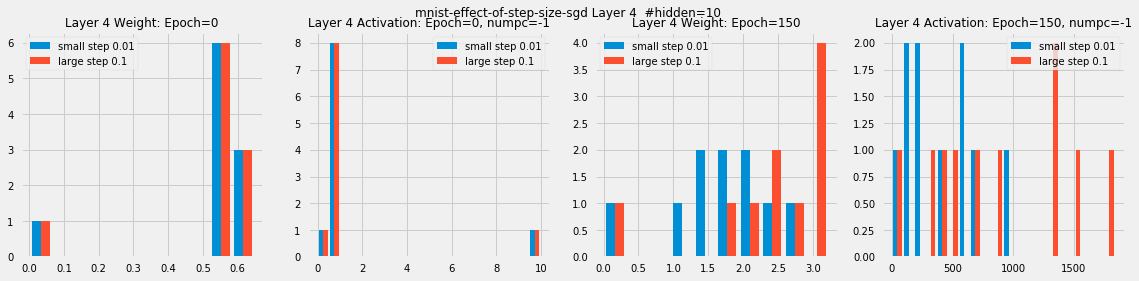

In [847]:
print('Normal scale histogram comparison at epochs')
if plotfig:
    

    for lab, idxs in zip(label_list, idxs_list):
        wkyes = sorted(results['singular_val_dicts_pca'][idxs[0]][0].keys())
        akeys = sorted(results['act_singular_val_dicts_train_pca'][idxs[0]][0].keys())
        for i, (weight_key, act_key) in enumerate(zip(wkeys, akeys)):
            if True:
                if not savfig:
                    plt.figure(figsize=[4*4, 4])
                for j, e in enumerate([epochs[0], epochs[-1]]):
                    figfix = 'layer_%d_hist_epoch_%d_'%(i+1, e)
                    comfix = 'Layer %d '%(i+1)
                    if savfig:
                        plt.figure(figsize=fs)
                    else:
                        plt.subplot(1, 4, 2*j+1)
                    data = []
                    for idx in idxs:
                        data.append(results['singular_val_dicts_pca'][idx][e][weight_key])
                    plt.hist(data, bins=10, label=labels)
                    plt.title(comfix+'Weight: Epoch=%d'%e)
                    plt.legend()
                    plt.tight_layout()
                    idx = idxs[0]
                    
                    if savfig:
                        plt.savefig(savepath+figfix+'weights.pdf')
                        plt.close()
                        plt.figure(figsize=fs)
                    else:
                        plt.subplot(1, 4, 2*j+2)

                    data = []
                    for idx in idxs:
                        data.append(results['act_singular_val_dicts_train_pca'][idx][e][act_key])
                    plt.hist(data, bins=20, label=labels)
                    plt.title(comfix+'Activation: Epoch=%d, numpc=%d'%(e, dim_acts))            
                    plt.legend()
                    plt.tight_layout()
                    if savfig:
                        plt.savefig(savepath+figfix+'train_acts.pdf')
                        plt.close()
                if not savfig:
                    plt.suptitle(lab+' Layer %d '%(i+1)+' #hidden=%d'%(len(results['act_singular_val_dicts_train_pca'][idx][e][act_key])))
                    plt.show()




## Init vs final

In [840]:
print('Log scale histogram comparison at init and final')
if plotfig:
    
    for i, (weight_key, act_key) in enumerate(zip(wkeys, akeys)):
        R, C = 1, 2*len(idxs)
        plt.figure(figsize=[3.1*C, 3*R])

        for jj, idx in enumerate(idxs):
            plt.subplot(R, C, 2*jj+1)
            
            [data1, data2] = [np.log10(results['singular_val_dicts_pca'][idx][0][weight_key]), 
                                            np.log10(results['singular_val_dicts_pca'][idx][-1][weight_key])]
            plt.hist([data1, data2], bins=20, label=['init','final'])
            plt.legend()
            plt.title(labels[jj]+' Weights')
        

            plt.subplot(R, C, 2*jj+2)
            [data1, data2] = [np.log10(results['act_singular_val_dicts_train_pca'][idx][0][act_key]), 
                                            np.log10(results['act_singular_val_dicts_train_pca'][idx][-1][act_key])]
            plt.hist([data1, data2], bins=20, label=['init','final'])
            plt.legend()
            plt.title(labels[jj]+' Activations')
        plt.suptitle(lab+' Layer %d '%(i+1)+' #hidden=%d'%(len(results['act_singular_val_dicts_train_pca'][idx][e][act_key])))
        plt.show()

Log scale histogram comparison at init and final


In [841]:
print('Normal scale histogram comparison at init and final')
if plotfig:
    
    for i, (weight_key, act_key) in enumerate(zip(wkeys, akeys)):
        R, C = 1, 2*len(idxs)
        plt.figure(figsize=[3.1*C, 3*R])

        for jj, idx in enumerate(idxs):
            plt.subplot(R, C, 2*jj+1)
            
            [data1, data2] = [results['singular_val_dicts_pca'][idx][0][weight_key], 
                             results['singular_val_dicts_pca'][idx][-1][weight_key]]
            plt.hist([data1, data2], bins=20, label=['init','final'])
            plt.legend()
            plt.title(labels[jj]+' Weights')
        

            plt.subplot(R, C, 2*jj+2)
            [data1, data2] = [results['act_singular_val_dicts_train_pca'][idx][0][act_key], 
                             results['act_singular_val_dicts_train_pca'][idx][-1][act_key]]
            plt.hist([data1, data2], bins=20, label=['init','final'])
            plt.legend()
            plt.title(labels[jj]+' Activations')
        plt.suptitle(lab+' Layer %d '%(i+1)+' #hidden=%d'%(len(results['act_singular_val_dicts_train_pca'][idx][e][act_key])))
        plt.show()

Normal scale histogram comparison at init and final
